# Configure and set-up of the environement

In [1]:
# configure your enviroment to the directory where you have the data set file

import sys
import os

# data analysis and wrangling
import pandas as pd
import numpy as np

import datetime as dt

# visualization
import seaborn as sns
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
sns.set(color_codes=True)
%matplotlib inline

# data profiling
from pandas_profiling import ProfileReport

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Read and explore the data sets

## Client table

In [2]:
# Read the dataset and save it on a data frame called "clients_df" using read_csv() pandas method

clients_df = pd.read_csv('mwc22-client_table.csv', header=[0])

In [3]:
# check the clients data frame using head()

clients_df.head()

,CLIENT ID,CLIENT_SEGMENT,AVG CONSO,AVG BASKET SIZE,RECEIVED_COMMUNICATION
0,24321771,6,"67,25","201,75",0
1,24321859,2,"58,33",350,0
2,24321880,3,"46,67",112,0
3,24321957,2,50,600,0
4,24321962,4,10,120,0


In [4]:
#get the data set info
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35884 entries, 0 to 35883
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLIENT ID               35884 non-null  int64 
 1   CLIENT_SEGMENT          35884 non-null  int64 
 2   AVG CONSO               35884 non-null  object
 3   AVG BASKET SIZE         35884 non-null  object
 4   RECEIVED_COMMUNICATION  35884 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.4+ MB


In [5]:
#check the shape of the data set
print(clients_df.shape)

(35884, 5)


In [6]:
# check unique values en each column
clients_df.nunique()

CLIENT ID                 35884
CLIENT_SEGMENT                6
AVG CONSO                  1494
AVG BASKET SIZE            3974
RECEIVED_COMMUNICATION        2
dtype: int64

## Orders table

In [7]:
# Read the dataset and save it on a data frame called "orders_df" using read_csv() pandas method

orders_df = pd.read_csv('mwc22-orders_table.csv',header=[0])

In [8]:
# check the orders data frame using head()

orders_df.head()

,CLIENT ID,NB PRODS,ORDER ID,FRUIT_PRODUCT
0,18070505,5,671907264,Apple
1,18070505,10,671907264,Orange
2,18070505,5,671907264,Kiwi
3,18070505,10,671907264,Pear
4,18070505,5,671907264,Cheery


In [9]:
#get the info of orders data frame  
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66912 entries, 0 to 66911
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CLIENT ID      66912 non-null  int64 
 1   NB PRODS       66912 non-null  int64 
 2   ORDER ID       66912 non-null  int64 
 3   FRUIT_PRODUCT  66912 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


In [10]:
#check the shape of the data set
print(orders_df.shape)

(66912, 4)


In [11]:
# check unique values en each column
clients_df.nunique()

CLIENT ID                 35884
CLIENT_SEGMENT                6
AVG CONSO                  1494
AVG BASKET SIZE            3974
RECEIVED_COMMUNICATION        2
dtype: int64

# Clean and prepar the data set

## Clients data frame 

In [12]:
# check for null value

clients_df.isna().sum()


CLIENT ID                 0
CLIENT_SEGMENT            0
AVG CONSO                 0
AVG BASKET SIZE           0
RECEIVED_COMMUNICATION    0
dtype: int64

In [13]:
# change the columns names 

clients_df = clients_df.rename(columns = {'CLIENT ID': 'client_id', 'CLIENT_SEGMENT' : 'segment', 'AVG CONSO': 'avg_conso', 'AVG BASKET SIZE': 'avg_basket_size',
       'RECEIVED_COMMUNICATION':'received_com'})

In [14]:

# Transform , by . 
clients_df["avg_conso"] = clients_df['avg_conso'].str.replace(',','.')
clients_df["avg_basket_size"] = clients_df['avg_basket_size'].str.replace(',','.')

# Transform object to numeric values
clients_df['avg_conso']= pd.to_numeric(clients_df['avg_conso'], errors='coerce')
clients_df['avg_basket_size']= pd.to_numeric(clients_df['avg_basket_size'], errors='coerce')

In [15]:
clients_df.nunique()

client_id          35884
segment                6
avg_conso           1494
avg_basket_size     3974
received_com           2
dtype: int64

In [16]:
clients_df.describe()

,client_id,segment,avg_conso,avg_basket_size,received_com
count,3.588400e+04,35884.000000,35884.000000,35884.000000,35884.000000
mean,2.706058e+07,3.123593,64.534437,181.218610,0.507998
std,8.835076e+06,1.512932,64.381932,129.604691,0.499943
min,1.807311e+07,1.000000,0.830000,10.000000,0.000000
25%,2.053311e+07,2.000000,20.830000,100.000000,0.000000
50%,2.462190e+07,3.000000,50.000000,160.000000,1.000000
75%,3.298538e+07,4.000000,88.170000,225.000000,1.000000
max,4.836594e+07,6.000000,2433.330000,3400.200000,1.000000


In [17]:
#Sanity Check for Negative values in ArrTime, CRSEArrivalTime, DepTime and CRSEDepTime
print(all(i < 0 for i in clients_df['avg_basket_size']))
print(all(i < 0 for i in clients_df['avg_conso']))
print(all(i < 0 for i in clients_df['segment']))

False
False
False


<AxesSubplot:xlabel='avg_conso'>

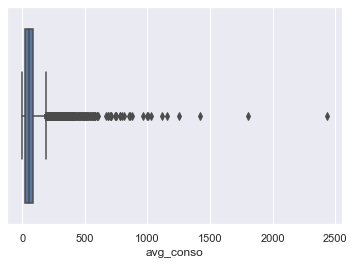

In [18]:
# check for outliers 

%matplotlib inline
sns.boxplot(x=clients_df['avg_conso'])


<AxesSubplot:xlabel='avg_basket_size'>

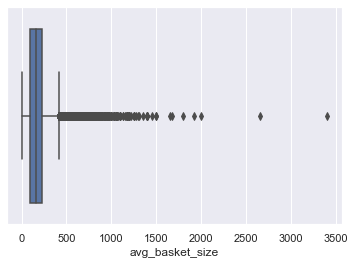

In [19]:
sns.boxplot(x=clients_df['avg_basket_size'])

In [20]:
#calculating the quantils Q1 and Q3 , and getting IQR
Q1 = clients_df.quantile(0.25)
Q3 = clients_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

client_id          12452269.00
segment                   2.00
avg_conso                67.34
avg_basket_size         125.00
received_com              1.00
dtype: float64


In [21]:
#takinh out the outliers 
clients_df = clients_df[(clients_df["avg_conso"]> Q1["avg_conso"] - (IQR["avg_conso"]*1.5)) & 
                        (clients_df["avg_conso"] <Q3["avg_conso"] + (IQR["avg_conso"]*1.5))]



In [22]:
clients_df.shape

(34494, 5)

In [23]:
clients_df = clients_df[(clients_df["avg_basket_size"]> Q1["avg_basket_size"] - (IQR["avg_basket_size"]*1.5)) & 
                        (clients_df["avg_basket_size"] <Q3["avg_basket_size"] + (IQR["avg_basket_size"]*1.5))]

In [24]:
clients_df.shape

(33343, 5)

<AxesSubplot:xlabel='avg_conso'>

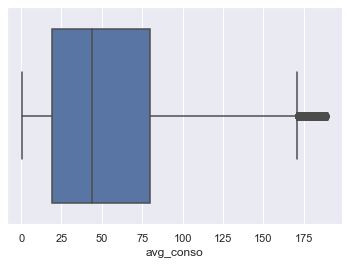

In [25]:
%matplotlib inline
sns.boxplot(x=clients_df['avg_conso'])

<AxesSubplot:xlabel='avg_basket_size'>

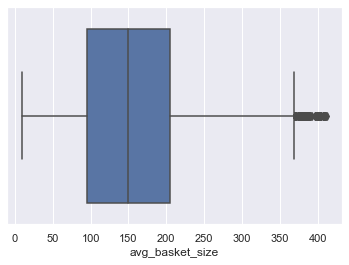

In [26]:
sns.boxplot(x=clients_df['avg_basket_size'])

## Orders data frame 


In [60]:
# we do the same with the orders data frame
# check for null values
orders_df.isna().sum()

client_id        0
total_orders     0
fruit_product    0
total_prods      0
dtype: int64

In [28]:
#change ths column names

orders_df = orders_df.rename(columns={'CLIENT ID': 'client_id', 'NB PRODS' : 'prod_num', 'ORDER ID': 'order_id', 'FRUIT_PRODUCT':'fruit_product'
      })

In [29]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66912 entries, 0 to 66911
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   client_id      66912 non-null  int64 
 1   prod_num       66912 non-null  int64 
 2   order_id       66912 non-null  int64 
 3   fruit_product  66912 non-null  object
dtypes: int64(3), object(1)
memory usage: 2.0+ MB


In [30]:
orders_df.describe()

,client_id,prod_num,order_id
count,6.691200e+04,66912.000000,6.691200e+04
mean,2.613407e+07,4.528112,6.722533e+08
std,8.473596e+06,5.788227,3.205826e+06
min,1.807050e+07,-80.000000,6.638335e+08
25%,2.017427e+07,1.000000,6.694803e+08
50%,2.438055e+07,3.000000,6.719971e+08
75%,2.538708e+07,5.000000,6.750893e+08
max,4.836586e+07,198.000000,6.832132e+08


In [31]:
#Sanity Check for Negative values in ArrTime, CRSEArrivalTime, DepTime and CRSEDepTime
print(all(i < 0 for i in orders_df['prod_num']))
print(all(i < 0 for i in orders_df['order_id']))


False
False


In [32]:
orders_df.nunique()

client_id        14499
prod_num            82
order_id         17458
fruit_product       24
dtype: int64

In [33]:
total_orders = orders_df.groupby(by=['client_id'], as_index = False)['order_id'].count()
total_orders.columns = ['client_id', 'total_orders']

products = orders_df.groupby(by=['client_id'], as_index = False)['fruit_product'].count()
products.columns = ['client_id', 'fruit_product']

total_prods = orders_df.groupby(by=['client_id'], as_index = False)['prod_num'].sum() 
total_prods.columns = ['client_id', 'total_prods']

temp_df = total_orders.merge(products, on = 'client_id')

orders_df = temp_df.merge(total_prods,on = 'client_id')


In [34]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14499 entries, 0 to 14498
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   client_id      14499 non-null  int64
 1   total_orders   14499 non-null  int64
 2   fruit_product  14499 non-null  int64
 3   total_prods    14499 non-null  int64
dtypes: int64(4)
memory usage: 566.4 KB


<AxesSubplot:xlabel='total_orders'>

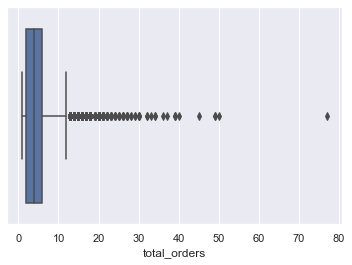

In [35]:
sns.boxplot(x=orders_df['total_orders'])

<AxesSubplot:xlabel='total_prods'>

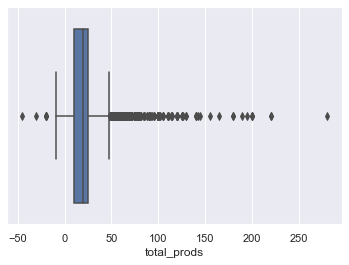

In [36]:
sns.boxplot(x=orders_df['total_prods'])

In [37]:
Q1_orders = orders_df.quantile(0.25)
Q3_orders = orders_df.quantile(0.75)
IQR_orders = Q3_orders - Q1_orders
print(IQR_orders)


client_id        5193650.0
total_orders           4.0
fruit_product          4.0
total_prods           15.0
dtype: float64


In [38]:
orders_df = orders_df[(orders_df["total_orders"]> Q1_orders["total_orders"] - (IQR_orders["total_orders"]*1.5)) & 
                        (orders_df["total_orders"] <Q3_orders["total_orders"] + (IQR_orders["total_orders"]*1.5))]

In [39]:
orders_df = orders_df[(orders_df["total_prods"]> Q1_orders["total_prods"] - (IQR_orders["total_prods"]*1.5)) & 
                        (orders_df["total_prods"] <Q3_orders["total_prods"] + (IQR_orders["total_prods"]*1.5))]

In [40]:
orders_df.shape

(13203, 4)

<AxesSubplot:xlabel='total_orders'>

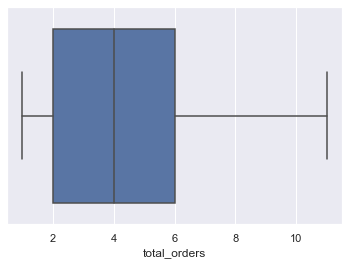

In [41]:
sns.boxplot(x=orders_df['total_orders'])

<AxesSubplot:xlabel='total_prods'>

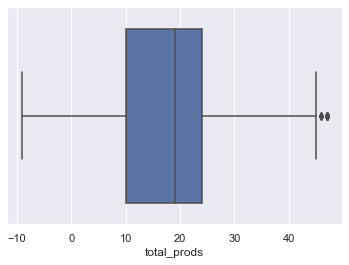

In [42]:
sns.boxplot(x=orders_df['total_prods'])

## Make the final data frame 

In [43]:
# Merge the both data frames on client_id: 

final_df = clients_df.merge(orders_df, how='inner', on= 'client_id',left_index=False, right_index=False).set_index('client_id')
final_df

,segment,avg_conso,avg_basket_size,received_com,total_orders,fruit_product,total_prods
client_id,,,,,,,
24321771,6,67.25,201.75,0,1,1,2
24321880,3,46.67,112.00,0,1,1,10
24322170,1,116.67,200.00,0,2,2,20
24322371,2,83.33,200.00,0,5,5,20
24322934,1,89.17,178.33,0,5,5,20
...,...,...,...,...,...,...,...
48323316,5,5.83,35.00,1,3,3,4
48323491,6,70.83,170.00,1,1,1,20
48335525,3,50.00,200.00,1,2,2,20


In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12358 entries, 24321771 to 48365861
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   segment          12358 non-null  int64  
 1   avg_conso        12358 non-null  float64
 2   avg_basket_size  12358 non-null  float64
 3   received_com     12358 non-null  int64  
 4   total_orders     12358 non-null  int64  
 5   fruit_product    12358 non-null  int64  
 6   total_prods      12358 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 772.4 KB


### Save the clean and prepared data

In [45]:
final_df.to_csv('final_df_newefruit.csv',index = False)
clients_df.to_csv('clients_df.csv',index = False)
orders_df.to_csv('orders_df.csv',index = False)


# Data analytics

In [47]:
# Generate and print the Profiling Report

profile = ProfileReport(orders_df, title='Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
#Creating a function to plot Box plot and Histogram
def hist_box_plot(df,feature, fig_num):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
    filtered = df.loc[~np.isnan(df[feature]), feature]
    sns.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    plt.show()

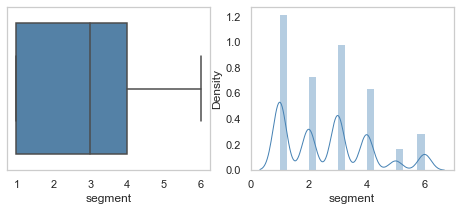

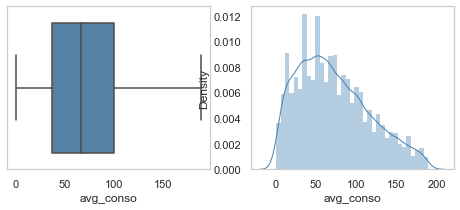

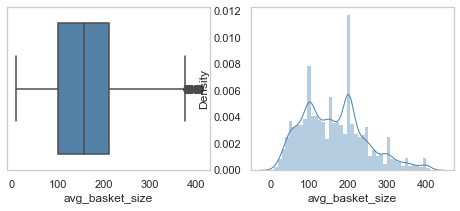

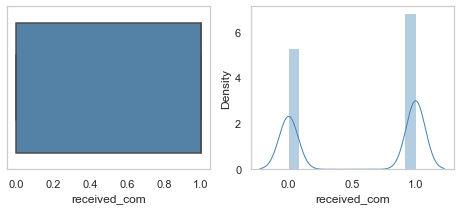

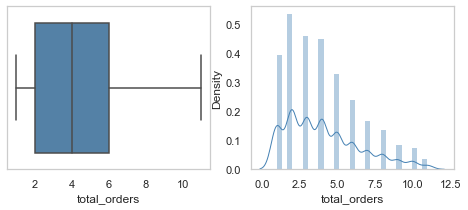

In [49]:
# hist_box_plot, to get a overview of tha dat and it distrubution:
fig_num = 1
for col in final_df.select_dtypes(include=[np.number]).columns:
    if col in ['segment','avg_conso','avg_basket_size','received_com','total_orders','fruit_prodoct']:
        hist_box_plot(final_df,col, fig_num)
        fig_num = fig_num + 1

In [50]:
#Creating a function to plot Count plot
%matplotlib inline
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(10,3))
    sns.countplot(x=feature, data=df, color = 'steelblue') # countplot
    plt.show()

In [51]:
#Creating a function to plot Count plot
%matplotlib inline
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(10,3))
    sns.countplot(x=feature, data=df, color = 'steelblue') # countplot
    plt.show()

<AxesSubplot:xlabel='received_com'>

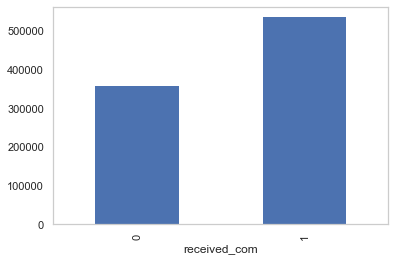

In [52]:
# let's check one by one of the columns that affect the sales, groupping by promotion reception, to study the impact.

# Imapct of the promotion on average comsum

%matplotlib inline
final_df.groupby('received_com').avg_conso.sum().plot.bar()


<AxesSubplot:xlabel='received_com'>

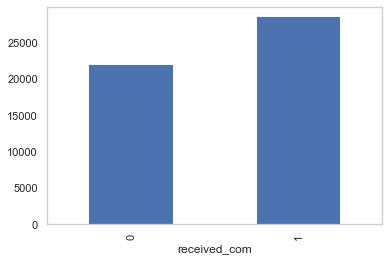

In [53]:
# Imapact of the promotion on the clients orders 

%matplotlib inline
final_df.groupby('received_com').total_orders.sum().plot.bar()

<AxesSubplot:xlabel='received_com'>

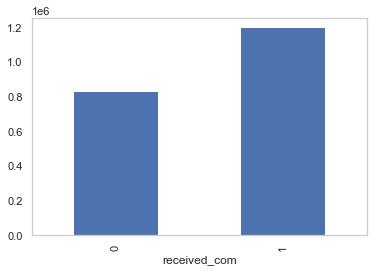

In [54]:
# Imapct of the promotion on avgerage basket
%matplotlib inline
final_df.groupby('received_com').avg_basket_size.sum().plot.bar()

<AxesSubplot:xlabel='received_com'>

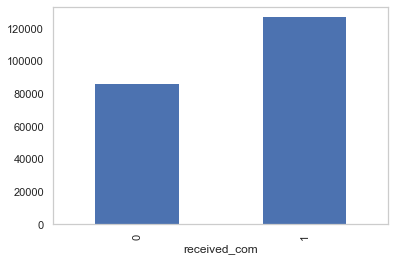

In [61]:
# Imapct of the promotion on total products:

%matplotlib inline
final_df.groupby('received_com').total_prods.sum().plot.bar()

<AxesSubplot:xlabel='received_com'>

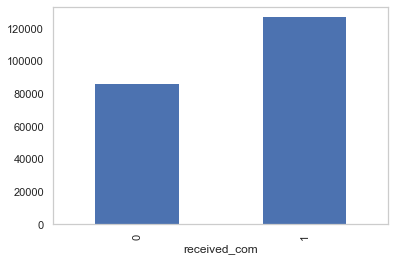

In [56]:
%matplotlib inline
final_df.groupby('received_com').total_prods.sum().plot.bar()

<AxesSubplot:xlabel='received_com'>

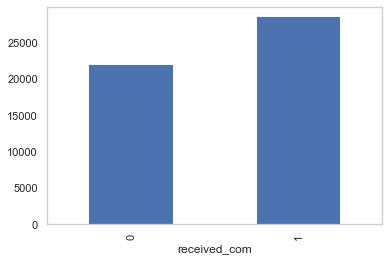

In [57]:
final_df.groupby('received_com').fruit_product.sum().plot.bar()

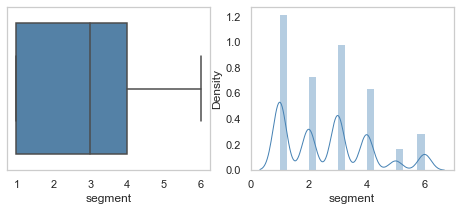

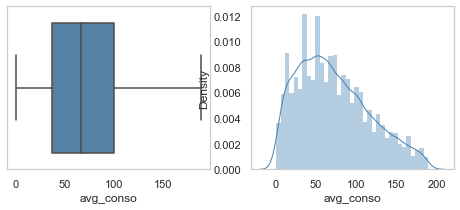

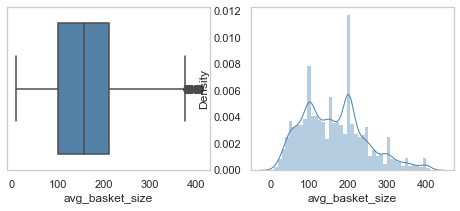

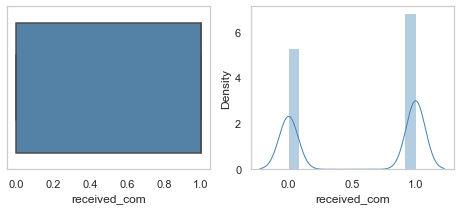

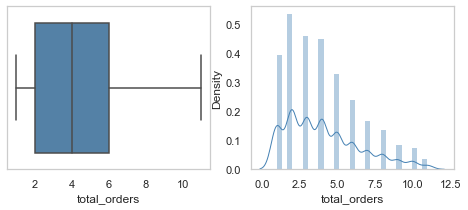

In [58]:
fig_num = 1
for col in final_df.select_dtypes(include=[np.number]).columns:
    if col in ['segment','avg_conso','avg_basket_size','received_com','total_orders','fruit_prodoct']:
        hist_box_plot(final_df,col, fig_num)
        fig_num = fig_num + 1

fig_num = 1
for col in final_df.select_dtypes(include=[np.number]).columns:
    if col in ['segment','avg_conso','avg_basket_size','received_com','total_orders','fruit_prodoct']:
       bar_plot(final_df,col, fig_num)
        fig_num = fig_num + 1

<AxesSubplot:xlabel='received_com'>

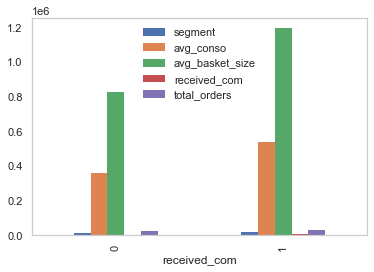

In [59]:
final_df.groupby(['received_com'])['segment','avg_conso','avg_basket_size','received_com','total_orders'].sum().plot.bar()

# Conclusion

By comparing total_orders,a, between the clients that receive the promotion code with the clients that didn't, it's clear that the promotion raised the total orders,avg_conso, as well as the average basket.